# PLot the Eastward Water Velocity over Northward water velocity 
### The following code I use the FVCOME data and make an animation for the velocity

### Import libraries

In [1]:
########import libraries#########
import numpy as np
import pandas as pd
import os
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))
from pylag.processing.plot import create_figure, colourmap
import cmocean
from matplotlib import pyplot as plt
#%config InlineBackend.figure_format = 'retina'
plt.ion()  # To trigger the interactive inline mode
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
import datetime

# Inputs

In [3]:
data_dir='/home/abolmaal/Data/FVCOMEDATA/202301'

# Create run directory
simulation_dir = '/home/abolmaal/modelling/FVCOM/Huron'

## Reading the data

In [24]:
#read data
drop_variables=['siglay','siglev']
#data = '/home/samin/data/112600_0001.nc'
# read all the nc files in a directory
# read the nc files in a data_dir
ds = xr.open_mfdataset(data_dir+'/*.nc', decode_times=False,drop_variables=drop_variables)
#ds = xr.open_dataset('nos.lmhofs.fields.n000.20230101.t00z.nc', decode_times=False,drop_variables=drop_variables)


In [28]:
ds

<xarray.Dataset> Size: 170MB
Dimensions:             (nele: 171377, node: 90806, three: 3, time: 1,
                         maxnode: 11, maxelem: 9, four: 4, siglay: 20,
                         siglev: 21)
Coordinates:
    lon                 (node) float32 363kB dask.array<chunksize=(90806,), meta=np.ndarray>
    lat                 (node) float32 363kB dask.array<chunksize=(90806,), meta=np.ndarray>
    lonc                (nele) float32 686kB dask.array<chunksize=(171377,), meta=np.ndarray>
    latc                (nele) float32 686kB dask.array<chunksize=(171377,), meta=np.ndarray>
  * time                (time) datetime64[ns] 8B 2028-05-29T18:00:00
Dimensions without coordinates: nele, node, three, maxnode, maxelem, four,
                                siglay, siglev
Data variables: (12/58)
    nprocs              int32 4B ...
    partition           (nele) int32 686kB dask.array<chunksize=(171377,), meta=np.ndarray>
    x                   (node) float32 363kB dask.array<chunksize=(90806,), meta=np.ndarray>
    y                   (node) float32 363kB dask.array<chunksize=(90806,), meta=np.ndarray>
    xc                  (nele) float32 686kB dask.array<chunksize=(171377,), meta=np.ndarray>
    yc                  (nele) float32 686kB dask.array<chunksize=(171377,), meta=np.ndarray>
    ...                  ...
    wet_cells_prev_ext  (time, nele) int32 686kB dask.array<chunksize=(1, 171377), meta=np.ndarray>
    aice                (time, node) float32 363kB dask.array<chunksize=(1, 90806), meta=np.ndarray>
    vice                (time, node) float32 363kB dask.array<chunksize=(1, 90806), meta=np.ndarray>
    tsfc                (time, node) float32 363kB dask.array<chunksize=(1, 90806), meta=np.ndarray>
    uuice               (time, nele) float32 686kB dask.array<chunksize=(1, 171377), meta=np.ndarray>
    vvice               (time, nele) float32 686kB dask.array<chunksize=(1, 171377), meta=np.ndarray>
Attributes: (12/15)
    title:                       LMHOFS
    institution:                 School for Marine Science and Technology
    source:                      FVCOM_4.3
    history:                     model started at: 01/01/2023   02:09
    references:                  http://fvcom.smast.umassd.edu, http://codfis...
    Conventions:                 CF-1.0
    ...                          ...
    River_Forcing:               THERE ARE 12 RIVERS IN THIS MODEL.\nRIVER IN...
    GroundWater_Forcing:         GROUND WATER FORCING IS OFF!
    Surface_Heat_Forcing:        FVCOM variable surface heat forcing file:\nF...
    Surface_Wind_Forcing:        FVCOM variable surface Wind forcing:\nFILE N...
    Surface_PrecipEvap_Forcing:  FVCOM periodic surface precip forcing:\nFILE...
    Ice_Model_Forcing:           FVCOM variable surface ice model forcing:\nF...

## Read the required variables

In [25]:
#read variables
lat = ds.variables['lonc']
lon=ds.variables['latc']
u = ds.variables['u']
v = ds.variables['v']
time = ds.variables['Times']

In [26]:
#print(time.values)
# print the lenght of the time
#print(len(time))
# print the format of time 
# print the mean of u and v
u_mean = u.mean().values
v_mean = v.mean().values


In [37]:
u_mean

array(0.00011028, dtype=float32)

In [27]:
ds['time'] = pd.to_timedelta(ds['time'], unit='D') + pd.Timestamp('2023-05-31')
year_month = ds['time'].dt.strftime('%Y-%m').values
print(year_month)


['2028-05']


In [29]:
### read times and save in a list
for i in range(0,20):
    dsplot=ds.isel(siglay=0, time=i)
    #print(dsplot.v.values)
    #print(dsplot.u.values)
    

IndexError: Index 1 is out of bounds for axis 0 with size 1

In [30]:
dsplot = ds.isel(siglay=0).isel(time=20)
dsplot.time.values
#dsplot.v[1].values

IndexError: Index 20 is out of bounds for axis 0 with size 1

In [6]:
u_mean = dsplot.u.mean(dim='nele')
print(u_mean.values)

# Plotting the data

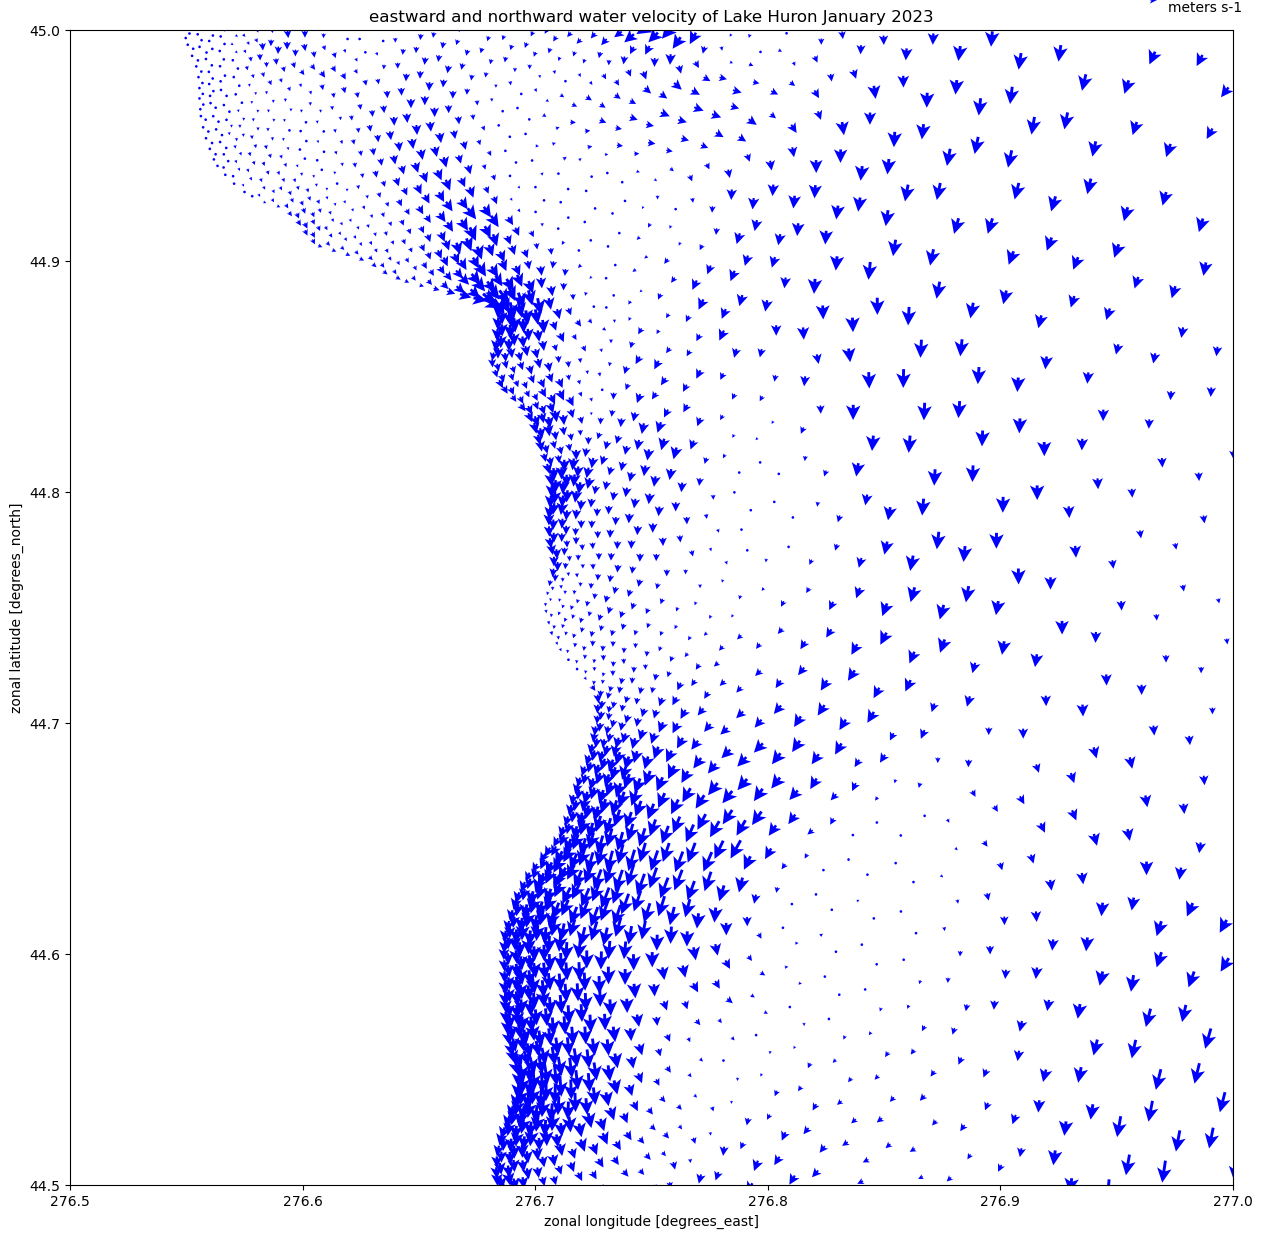

In [55]:

fig, ax = plt.subplots(figsize=(15,15))
quiver = dsplot.plot.quiver(x="lonc", y="latc", ax = ax, u='u', v='v',robust=True, 
                           width= 0.0025,headaxislength=4,headwidth=5, minshaft=1,color='blue',
                           scale_units='inches', scale=0.5) 
ax.set(xlim=(276.5,277), ylim=(44.5,45))
# add title to the plot base on the time
ax.set_title('eastward and northward water velocity of Lake Huron January 2023')
# add the mean of the current velocity to the title
#ax.set_title('the current velocity of the ocean MArch 2023\n u_mean = {:.2f}, v_mean = {:.2f}'.format(u_mean.mean().values, dsplot.v.mean().values))

# save the figure in the following directory /home/samin/data/FVCOME_OUTPUT/Gldata/FVCOMEDATA with the name Currentvelocity202306.png
plt.savefig('/home/abolmaal/modelling/FVCOM/Huron/figures/Currentvelocity202308.png')
plt.show()

## Plotting the Animation

In [39]:
fig, ax = plt.subplots(figsize=(8,8))

def update_quiver(num):
    
    dsplot = ds.isel(siglay=0).isel(time=num)
    quiver = dsplot.plot.quiver(x="lonc", y="latc", ax = ax, u='u', v='v', 
                           width= 0.0005,minlength=5,headaxislength=4,headwidth=4, minshaft=1,color='blue',
                           scale_units= 'inches', scale=0.5)
    ax.set(xlim=(276,277.69), ylim=(44,44.55))
    ax.set_title(f'Time: {ds["time"].values[num]}')
    return(quiver,)

plt.close(fig)

anim = animation.FuncAnimation(fig,update_quiver,frames=10,
                           interval= 500, blit=False)
    #update_quiver(i)
    #ax.set_xlim(276,278)
    #ax.set_ylim(45.5,46)
    #fig.tight_layout()
plt.show()                         
HTML(anim.to_html5_video())
# save the animimation in the following directory /home/samin/data/FVCOME_OUTPUT/Gldata/FVCOMEDATA with the name Currentvelocity202306.gif
anim.save('/home/abolmaal/modelling/FVCOM/Huron/figures/Currentvelocity202301.gif', writer='imagemagick', fps=10)



IndexError: Index 1 is out of bounds for axis 0 with size 1